# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202112 
## SECTION: A real-world data journey
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.decomposition import PCA

In [2]:
plt.rcParams['figure.dpi'] = 110

In [3]:
# data urls
marriage_url = 'https://www.cdc.gov/nchs/data/dvs/state-marriage-rates-90-95-99-19.xlsx'
divorce_url = 'https://www.cdc.gov/nchs/data/dvs/state-divorce-rates-90-95-99-19.xlsx'
# data paths
marriage_path = 'E:/Education/Udemy/Stats_ML/18_Data_journey/state-marriage-rates-90-95-99-19.xlsx'
divorce_path = 'E:/Education/Udemy/Stats_ML/18_Data_journey/state-divorce-rates-90-95-99-19.xlsx'

# Import the marriage data

In [4]:
# data = pd.read_excel(marriage_url, header=5)
data = pd.read_excel(marriage_path, header=5)  # данные начинаются с пятой строчки; в ней - заголовки
data.rename(columns={"Unnamed: 0": "State"}, inplace=True)  # Переименовываем столбец 
# data

In [5]:
# remove irrelevant rows
data.drop([0, 52, 53, 54, 55, 56, 57], axis=0, inplace=True)
# data

In [6]:
# replace --- with nan
data = data.replace({'---': np.nan})
# data

In [7]:
# replace nan's with column median
data.fillna(data.median(axis=0, numeric_only=True), inplace=True)
data

,State,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,2006,2005,2004,2003,2002,2001,2000,1999,1995,1990
1,Alabama,6.697687,6.760408,7.047340,7.147821,7.351544,7.806776,7.817785,8.2,8.4,...,9.2,9.2,9.4,9.6,9.9,9.4,10.10,10.8,9.8,10.6
2,Alaska,6.512245,6.683952,6.914078,7.103441,7.407588,7.508836,7.293928,7.2,7.8,...,8.2,8.2,8.5,8.1,8.3,8.1,8.90,8.6,9.0,10.2
3,Arizona,5.302995,5.534434,5.834867,5.930541,5.922469,5.780449,5.401091,5.6,5.7,...,6.5,6.6,6.7,6.5,6.7,7.6,7.50,8.2,8.8,10.0
4,Arkansas,8.377284,8.863156,9.456845,9.860962,10.040279,10.112026,9.751052,10.9,10.4,...,12.4,12.9,13.4,13.4,14.3,14.3,15.40,14.8,14.4,15.3
5,California 1,5.723191,6.035132,6.278250,6.463590,6.184957,6.441492,6.460467,6.0,5.8,...,6.3,6.4,6.4,6.1,6.2,6.5,5.80,6.4,6.3,7.9
6,Colorado,7.273297,7.585728,7.333845,7.425443,6.791807,7.061603,6.452664,6.8,7.0,...,7.2,7.6,7.4,7.8,8.0,8.2,8.30,8.2,9.0,9.8
7,Connecticut,5.048401,5.278133,5.553784,5.617858,5.292009,5.368845,5.021023,5.2,5.5,...,5.5,5.8,5.8,5.5,5.7,5.4,5.70,5.8,6.6,7.9
8,Delaware,4.951919,5.237957,5.528417,5.613062,5.712872,6.022783,6.571976,5.8,5.2,...,5.9,5.9,6.1,6.0,6.4,6.5,6.50,6.7,7.3,8.4
9,District of Columbia,7.773302,7.835377,8.239526,8.149214,8.220425,11.821343,10.791261,8.4,8.7,...,4.0,4.1,5.2,5.1,5.1,6.2,4.90,6.6,6.1,8.2
10,Florida,7.070065,7.332063,7.806895,8.125967,8.234362,7.301404,7.009614,7.2,7.4,...,8.6,8.9,9.0,9.0,9.4,9.3,8.90,8.7,9.9,10.9


In [8]:
# extract to matrices
yearM = data.columns[1:].to_numpy().astype(float)
print(f"\nyearM = {yearM}")

statesM = data.iloc[:, 0]
print(f"\nstatesM: \n{statesM}")

M = data.iloc[:, 1:].to_numpy()
print(f"\nData: \n{np.round(M, 2)}")


yearM = [2019. 2018. 2017. 2016. 2015. 2014. 2013. 2012. 2011. 2010. 2009. 2008.
 2007. 2006. 2005. 2004. 2003. 2002. 2001. 2000. 1999. 1995. 1990.]

statesM: 
1                  Alabama
2                   Alaska
3                  Arizona
4                 Arkansas
5             California 1
6                 Colorado
7              Connecticut
8                 Delaware
9     District of Columbia
10                 Florida
11                 Georgia
12                  Hawaii
13                   Idaho
14                Illinois
15                 Indiana
16                    Iowa
17                  Kansas
18                Kentucky
19               Louisiana
20                   Maine
21                Maryland
22           Massachusetts
23                Michigan
24               Minnesota
25             Mississippi
26                Missouri
27                 Montana
28                Nebraska
29                  Nevada
30           New Hampshire
31              New Jersey
32

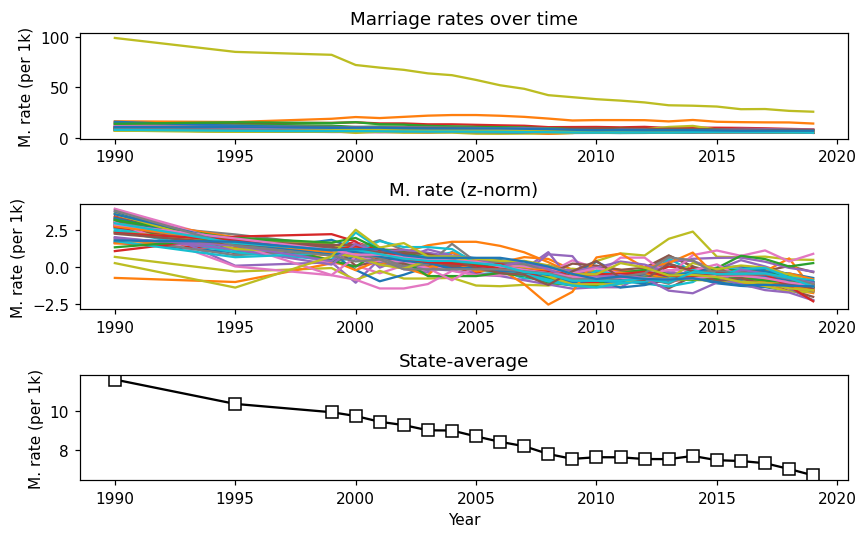

In [9]:
# make some plots

fig, ax = plt.subplots(3, 1, figsize=(8, 5))

ax[0].plot(yearM, M.T)  # это нетривиально - plot понимает, что одному х отвечает несколько у
ax[0].set_ylabel('M. rate (per 1k)')
ax[0].set_title('Marriage rates over time')

ax[1].plot(yearM, stats.zscore(M.T))
ax[1].set_ylabel('M. rate (per 1k)')
ax[1].set_title('M. rate (z-norm)')

# 'axis=': Axis or axes along which the means are computed
ax[2].plot(yearM, np.mean(M, axis=0), 'ks-', markerfacecolor='w', markersize=8)
ax[2].set_ylabel('M. rate (per 1k)')
ax[2].set_title('State-average')
ax[2].set_xlabel('Year')
# notice that x-axis is non-constant

# QUESTION: Is this the same as the US average?
# ANSWER: Yep
'''
So because the data are normalized within each state (marriage per 1000 people),
then averaging the data from all the states together
is actually equivalent to the national average.
'''

plt.tight_layout()
plt.show()

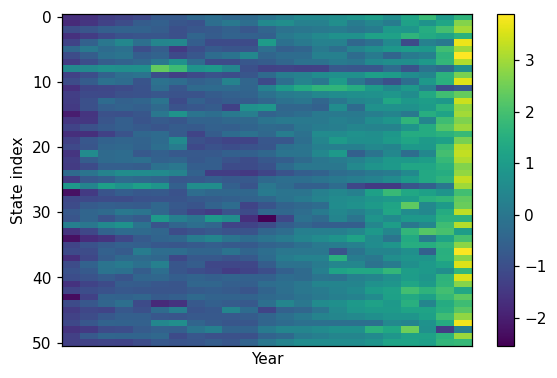

In [10]:
'''
ВАЖНО! 
zscore с предыдущего рисунка был построен с помощью функции plot и простых линий.
plot автоматически отсортировал значения по возрастанию, а imshow этого не делает.
Поэтому на данном графике правая часть отвечает 90-тым, а левая - 10-тым.
'''

plt.imshow(stats.zscore(M, axis=1), aspect='auto')
plt.xticks([])
plt.xlabel('Year')
plt.ylabel('State index')
plt.colorbar()
plt.show()

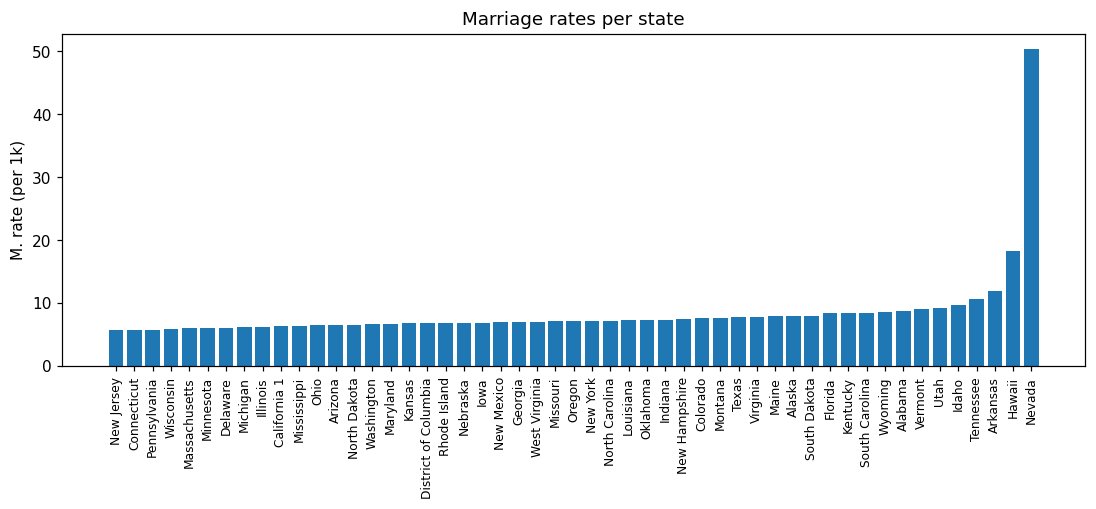

In [11]:
# barplot of average marriage rate of each state

# average over time
meanMarriageRate = np.mean(M, axis=1)

# sort index
sidx_M = np.argsort(meanMarriageRate)

fig = plt.figure(figsize=(12, 4))
plt.bar(statesM.iloc[sidx_M], meanMarriageRate[sidx_M])
plt.xticks(rotation=90, fontsize=8)
plt.ylabel('M. rate (per 1k)')
plt.title('Marriage rates per state')
plt.show()

# QUESTION:
#   Is Nevada a non-representative datapoint or an error?
# ANSWER:
# It's non representative,
# but we don't have any reason to exclude it because it seems to be valid data.

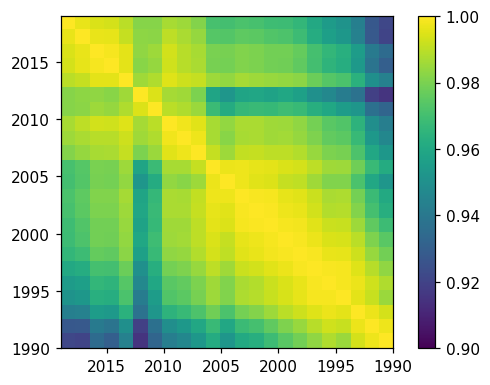

In [12]:
# show the correlation matrix

plt.imshow(np.corrcoef(M.T), vmin=0.9, vmax=1,
           extent=[yearM[0], yearM[-1], yearM[-1], yearM[0]])
plt.colorbar()
plt.show()

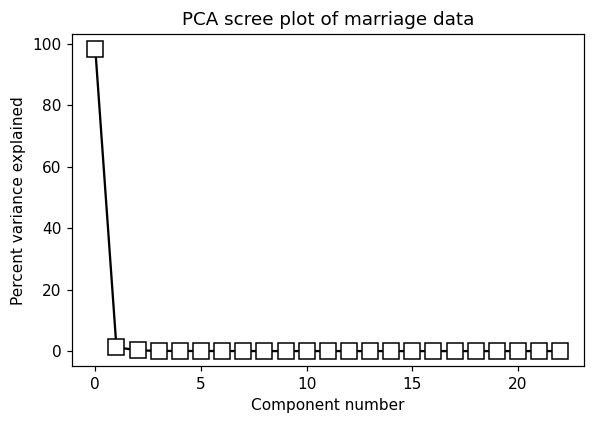

In [13]:
# PCA

pca = PCA().fit(M)

# scree plot
plt.plot(100*pca.explained_variance_ratio_, 'ks-', markerfacecolor='w', markersize=10)
plt.ylabel('Percent variance explained')
plt.xlabel('Component number')
plt.title('PCA scree plot of marriage data')
plt.show()
# 100*pca.explained_variance_ratio_

# Repeat for divorce data

In [14]:
# import and process the data 
data = pd.read_excel(divorce_path, header=5)
data.rename(columns={"Unnamed: 0": "State"}, inplace=True)  # Переименовываем столбец 
data.drop([0, 52, 53, 54, 55, 56, 57], axis=0, inplace=True)
data = data.replace({'---': np.nan})
data.fillna(data.median(axis=0, numeric_only=True), inplace=True)

# assign to variables
yearD = data.columns[1:].to_numpy().astype(float)
statesD = data.iloc[:, 0]
D = data.iloc[:, 1:].to_numpy()

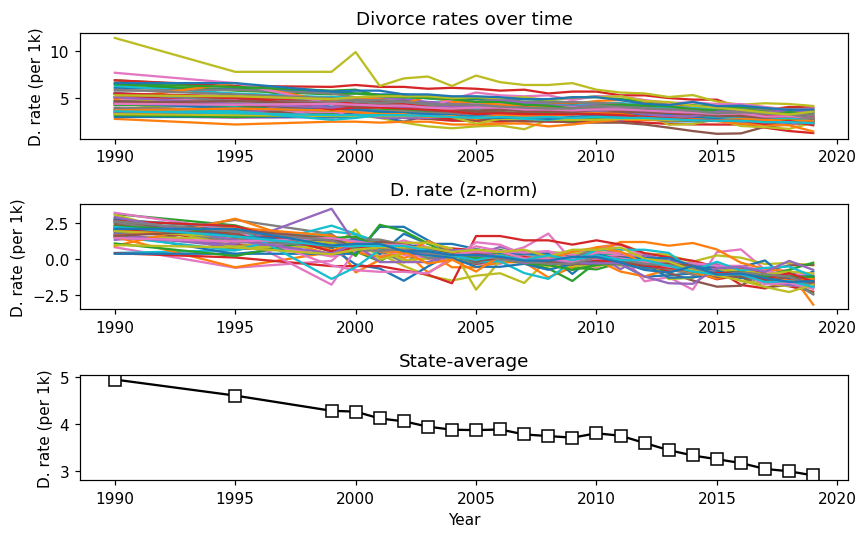

In [15]:
# make some plots
fig, ax = plt.subplots(3, 1, figsize=(8, 5))

ax[0].plot(yearD, D.T)
ax[0].set_ylabel('D. rate (per 1k)')
ax[0].set_title('Divorce rates over time')

ax[1].plot(yearD, stats.zscore(D.T))
ax[1].set_ylabel('D. rate (per 1k)')
ax[1].set_title('D. rate (z-norm)')

# notice that x-axis is non-constant
ax[2].plot(yearD, np.mean(D, axis=0), 'ks-', markerfacecolor='w', markersize=8)
ax[2].set_ylabel('D. rate (per 1k)')
ax[2].set_title('State-average')
ax[2].set_xlabel('Year')
plt.tight_layout()
plt.show()

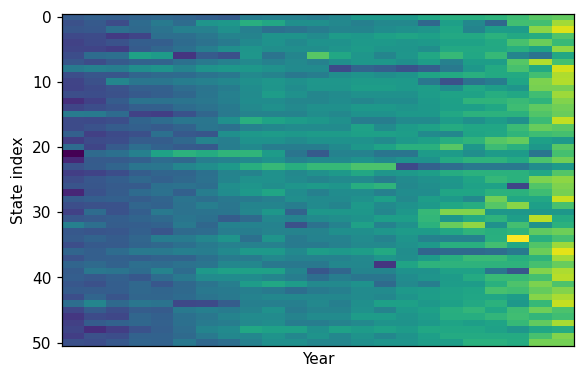

In [16]:
plt.imshow(stats.zscore(D, axis=1), aspect='auto')
plt.xticks([])
plt.xlabel('Year')
plt.ylabel('State index')
plt.show()

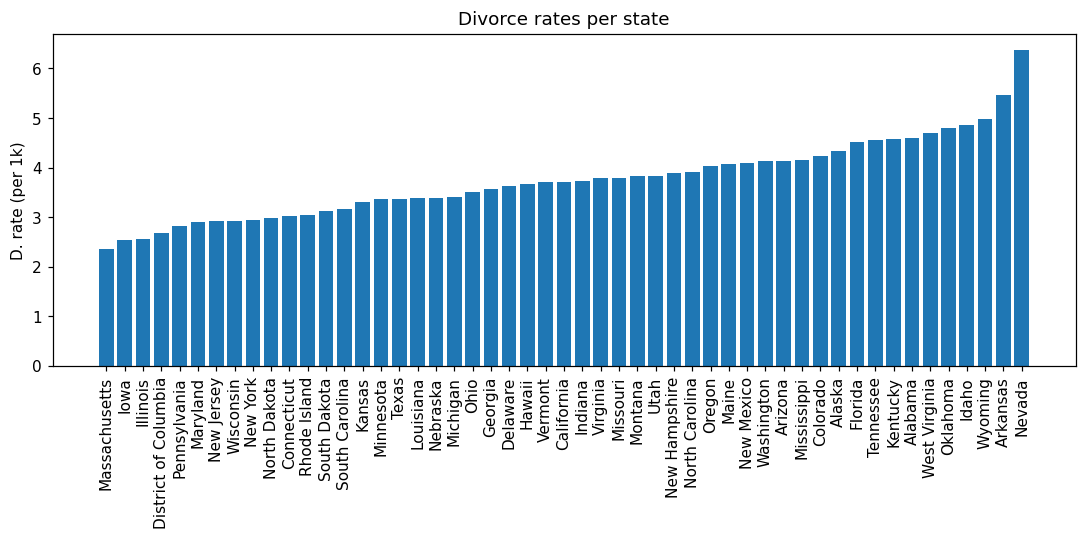

In [17]:
# barplot of average marriage rate
meanDivorceRate = np.mean(D, axis=1)
sidx_D = np.argsort(meanDivorceRate)

fig = plt.figure(figsize=(12, 4))
plt.bar(statesD.iloc[sidx_D], meanDivorceRate[sidx_D])
plt.xticks(rotation=90)
plt.ylabel('D. rate (per 1k)')
plt.title('Divorce rates per state')
plt.show()

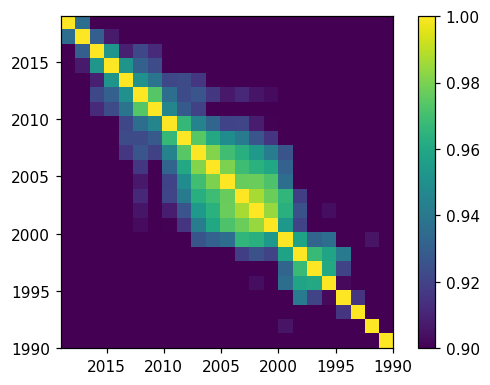

In [18]:
# show the correlation matrix
plt.imshow(np.corrcoef(D.T), vmin=0.9, vmax=1,
           extent=[yearD[0], yearD[-1], yearD[-1], yearD[0]])
plt.colorbar()
plt.show()

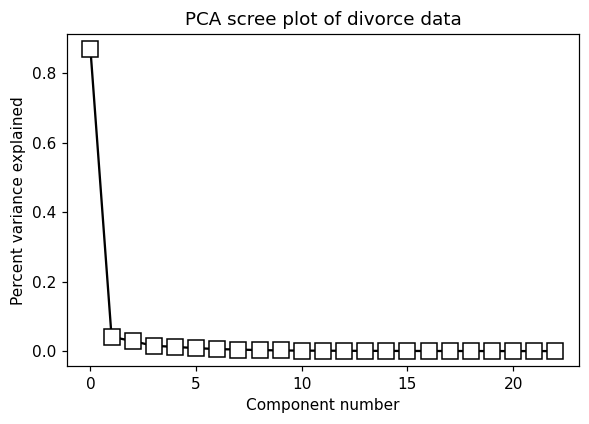

In [19]:
# PCA
pca = PCA().fit(D)

# scree plot
plt.plot(pca.explained_variance_ratio_, 'ks-', markerfacecolor='w', markersize=10)
plt.ylabel('Percent variance explained')
plt.xlabel('Component number')
plt.title('PCA scree plot of divorce data')
plt.show()

In [20]:
# check if marriage and divorce datasets have the same year/state order

# should be zero
print('Comparison of year vectors: ')
print(np.sum(yearD-yearM))

# should be TRUE
print('')
print('Comparison of states vectors: ')
print(statesM.equals(statesD))
# ... uh oh...

# compare
tmpStateNames = pd.concat([statesM, statesD], axis=1)
print(tmpStateNames)

# find the difference
diff = np.where(tmpStateNames.iloc[:, 0] != tmpStateNames.iloc[:, 1])
print(diff)
# at index 4 there is a difference!
# We can fix it, but it is very minor and can be left alone

Comparison of year vectors: 
0.0

Comparison of states vectors: 
False
                   State                 State
1                Alabama               Alabama
2                 Alaska                Alaska
3                Arizona               Arizona
4               Arkansas              Arkansas
5           California 1            California
6               Colorado              Colorado
7            Connecticut           Connecticut
8               Delaware              Delaware
9   District of Columbia  District of Columbia
10               Florida               Florida
11               Georgia               Georgia
12                Hawaii                Hawaii
13                 Idaho                 Idaho
14              Illinois              Illinois
15               Indiana               Indiana
16                  Iowa                  Iowa
17                Kansas                Kansas
18              Kentucky              Kentucky
19             Louisiana            

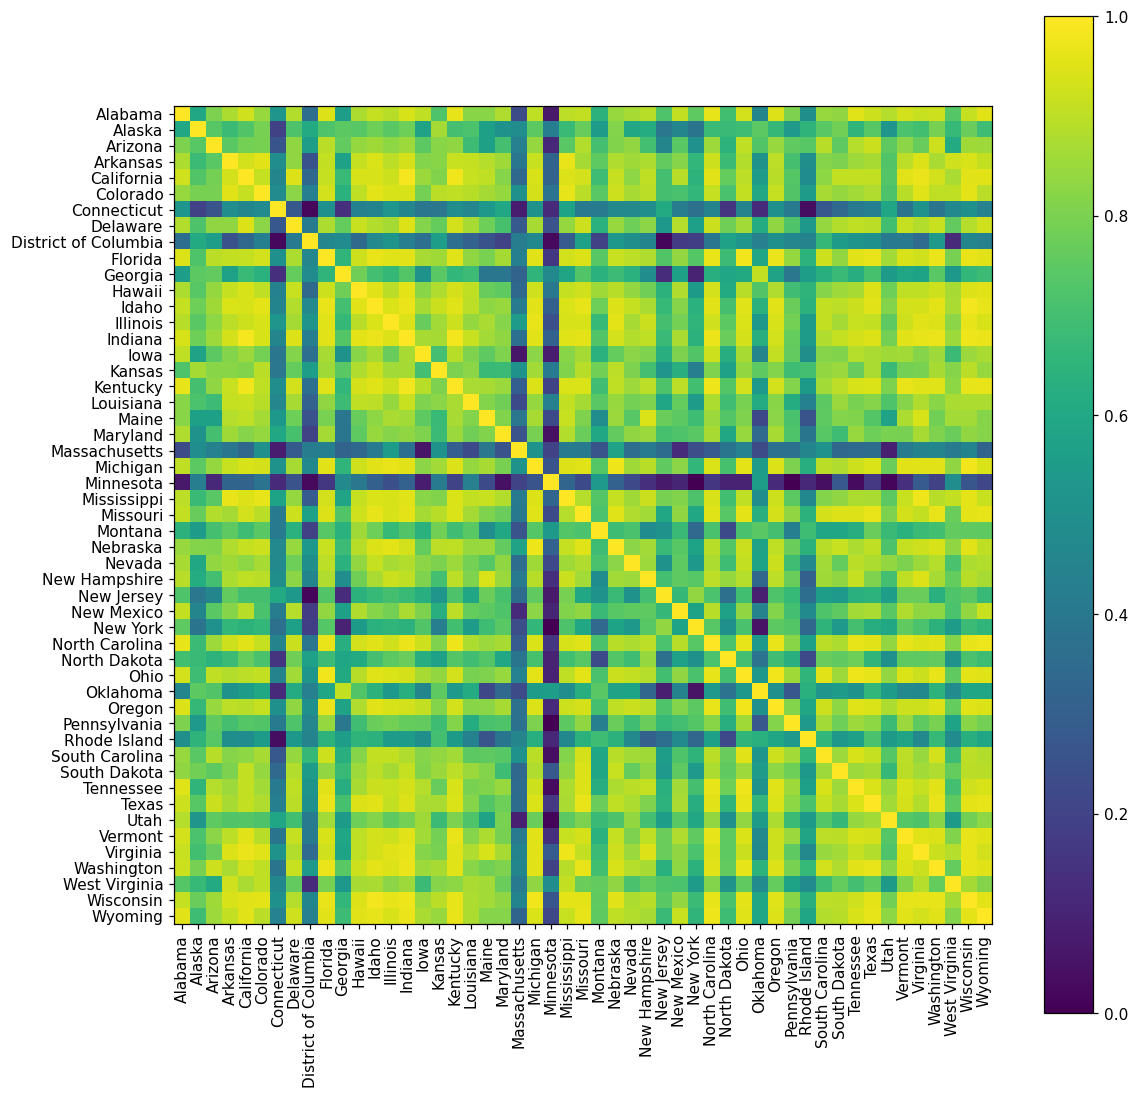

In [21]:
# btw, you can also correlate over states

fig = plt.figure(figsize=(12, 12))
plt.imshow(np.corrcoef(D), vmin=0, vmax=1)
plt.xticks(ticks=range(len(statesD)), labels=statesD, rotation=90)
plt.yticks(ticks=range(len(statesD)), labels=statesD)
plt.colorbar()
plt.show()

# Now for some inferential statistics

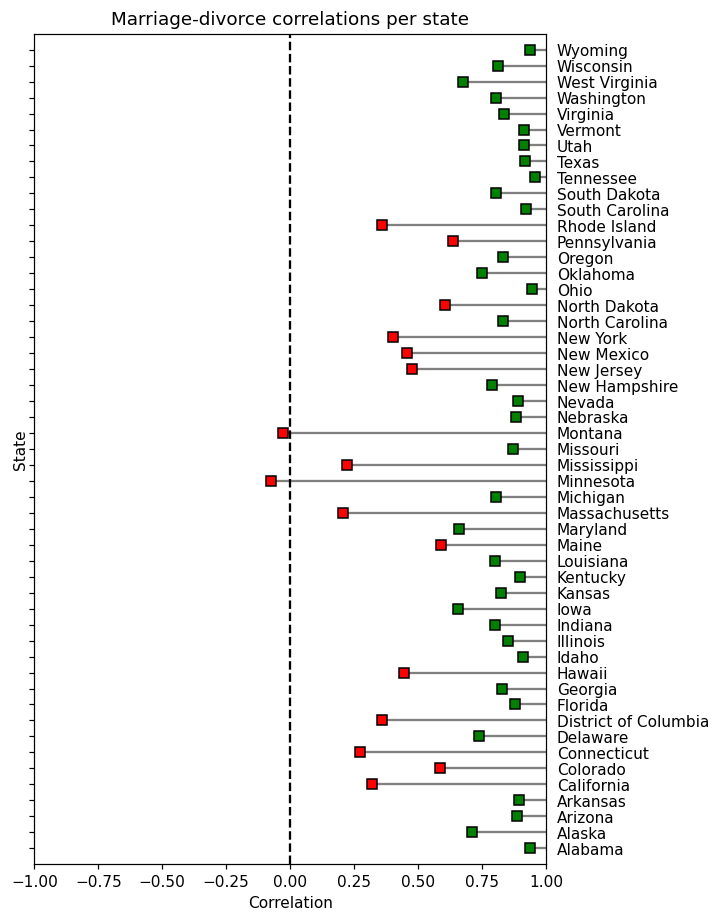

In [22]:
# Correlate M and D over time per state


# Bonferroni corrected threshold
pvalThresh = 0.05/51

fig = plt.figure(figsize=(6, 10))
color = 'rg'

for si in range(len(statesM)):
    # compute correlation
    r, p = stats.pearsonr(M[si,:], D[si,:])
    # plot the data point
    plt.plot([r, 1], [si, si], '-', color=[0.5, 0.5, 0.5])  # сама линия
    plt.plot(r, si, 'ks', markerfacecolor=color[bool(p < pvalThresh)])  # квадратик на её конце
    # p < pvalThresh
    # Если True, то коэффициент корреляции статистически значим - зелёный квадратик
    # Если False, то наоборот - красный квадратик

plt.ylabel('State')
plt.xlabel('Correlation')
plt.title('Marriage-divorce correlations per state')
plt.yticks(range(len(statesM)), labels=statesD)
plt.tick_params(axis='y', which='both', labelleft=False, labelright=True)
plt.xlim([-1, 1])
plt.ylim([-1, 51])
plt.plot([0, 0],[-1, 51],'k--')  # линия через х=0
plt.show()

# красный квадратик говорит о статистически незначимой корреляции между разводами и бракам в 
# том или ином штате

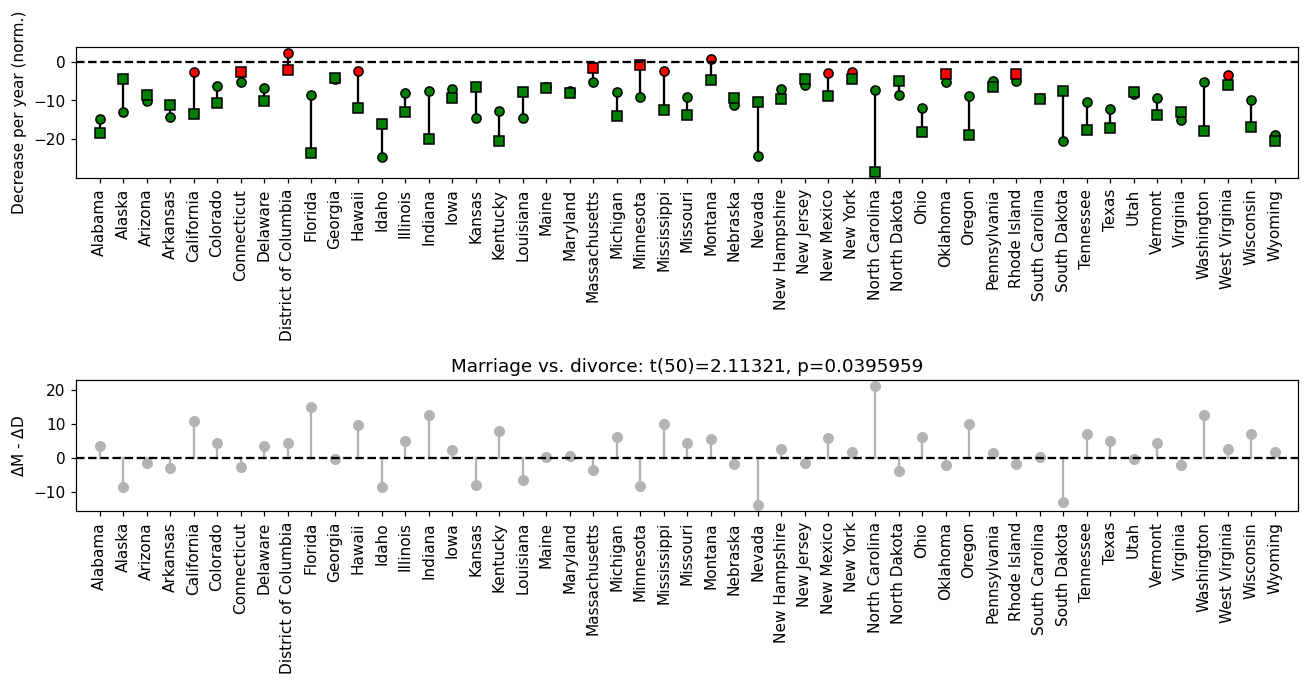

In [30]:
# have marriage/divorce rates really declined over time?

fig, ax = plt.subplots(2, 1, figsize=(12, 6))

# initialize slope differences vector
MvsD = np.zeros(len(statesM))

for rowi in range(len(statesM)):
    # run regression (includes the intercept!)
    bM, intercept, r, pM, seM = stats.linregress(yearM, M[rowi, :])
    bD, intercept, r, pD, seD = stats.linregress(yearM, D[rowi, :])
    
    # normalize (standardiza) beta coefficients
    # (dividing standard error of the estimated slope)
    bM = bM / seM
    bD = bD / seD
    
    # plot the slope values
    ax[0].plot([rowi, rowi], [bM, bD], 'k')  # рисуется линия между бета-коэффициентами
    # рисуется точка, цвет которой зависит от пи-значения
    ax[0].plot(rowi, bM, 'ko', markerfacecolor=color[bool(pM<pvalThresh)]) 
    ax[0].plot(rowi, bD, 'ks', markerfacecolor=color[bool(pD<pvalThresh)])
    
    # plot the slope differences
    ax[1].plot([rowi, rowi], [bM-bD, 0], '-', color=[0.7, 0.7, 0.7])
    ax[1].plot([rowi, rowi], [bM-bD, bM-bD], 'o', color=[0.7, 0.7, 0.7])  # есть вопросы к этой конструкции
    
    # store the slope differences for subsequent t-test
    MvsD[rowi] = bM-bD

# make the plot look nicer
for i in range(2):
    ax[i].set_xticks(range(51))
    ax[i].set_xticklabels(statesD, rotation=90)
    ax[i].set_xlim([-1, 51])
    ax[i].plot([-1, 52], [0, 0], 'k--')

ax[0].set_ylabel('Decrease per year (norm.)')
ax[1].set_ylabel('$\Delta$M - $\Delta$D')

### ttest on whether the M-vs-D rates are really different
# This is a test for the null hypothesis that the expected value (mean) of a sample
# of independent observations a is equal to the given population mean, popmean.
t, p = stats.ttest_1samp(MvsD, popmean=0)  
df = len(MvsD)-1

# set the title
ax[1].set_title('Marriage vs. divorce: t(%g)=%g, p=%g'%(df, t, p))

plt.tight_layout()
plt.show()

Эти графики иллюстирует следующее:
1) Разница между коэффициентами наклона bM для данных о браках и коэффициентами наклона bD для данных о разводах положительна для большинства штатов.

2) Это значит, что количество браков уменьшается, но количество разводов уменьшается быстрее.